In [1]:
import pickle
import numpy as np
with open('scenes_keemotion.pickle', 'rb') as f:
    scenes = pickle.load(f)

/export/home/ghasemzadeh/pifpaf_modified/deepsport_pose_emb/openpifpaf/visualizer/base.py:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Oranges"))
  matplotlib.cm.get_cmap('Oranges').set_bad('white', alpha=0.5)
/export/home/ghasemzadeh/pifpaf_modified/deepsport_pose_emb/openpifpaf/visualizer/base.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  matplotlib.cm.get_cmap('Blues').set_bad('white', alpha=0.5)
/export/home/ghasemzadeh/pifpaf_modified/deepsport_pose_emb/openpifpaf/visualizer/base.py:14: MatplotlibDeprecat

In [3]:
data, target, meta = next(iter(scenes))

In [4]:
print('Number of heads: ', len(target))
print('Number of fields in PIF: ', len(target[0]))
print('Number of fields in PAN: ', len(target[1]))
print('Batch size: ', len(target[0][0]))

Number of heads:  2
Number of fields in PIF:  3
Number of fields in PAN:  4
Batch size:  4


In [23]:
data_in_batch = 3

In [24]:
confidence = target[0][0][data_in_batch][0].numpy()
from openpifpaf.datasets.constants import COCO_KEYPOINTS

for k in range(len(COCO_KEYPOINTS)):
    confidence = target[0][0][data_in_batch][k].numpy()
    ones = 0
    zeros = 0
    nans = 0
    others = 0
    for i in range(len(confidence)):
        for j in range(len(confidence[0])):
            if confidence[i,j] == 1:
                ones += 1
            elif confidence[i,j] == 0:
                zeros += 1
            elif np.isnan(confidence[i,j]):
                nans += 1
            else:
    #             print(confidence[i,j])
#                 nans += 1
                pass

    print('      keypoint: ', COCO_KEYPOINTS[k])
    print('ones: ', ones)
    print('zeros: ', zeros)
    print('nans: ', nans)
    print('-----------------------')
# print('others: ', others)
            

      keypoint:  nose
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_eye
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  right_eye
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_ear
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  right_ear
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_shoulder
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  right_shoulder
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_elbow
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  right_elbow
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_wrist
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  right_wrist
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_hip
ones:  0
zeros:  2401
nans:  0
-----------------------
      key

IndexError: index 18 is out of bounds for dimension 0 with size 18

In [ ]:
# print(target[0][0][data_in_batch][0].shape)
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# plt.imshow(target[0][0][data_in_batch][0])
from openpifpaf.datasets.constants import COCO_KEYPOINTS
#####################
# visualize PIF Confidence
#####################


import matplotlib.pyplot as plt
axes = []
fig = plt.figure(figsize=(20,120))
for i in range(18):
    axes.append(fig.add_subplot(9, 2, i+1))
    subplot_title = ('Keypoint: '+ COCO_KEYPOINTS[i])
    axes[-1].set_title(subplot_title)
    con = target[0][0][data_in_batch][i].numpy()
#     aa = np.ones
    plt.imshow(con+10, cmap='jet')
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

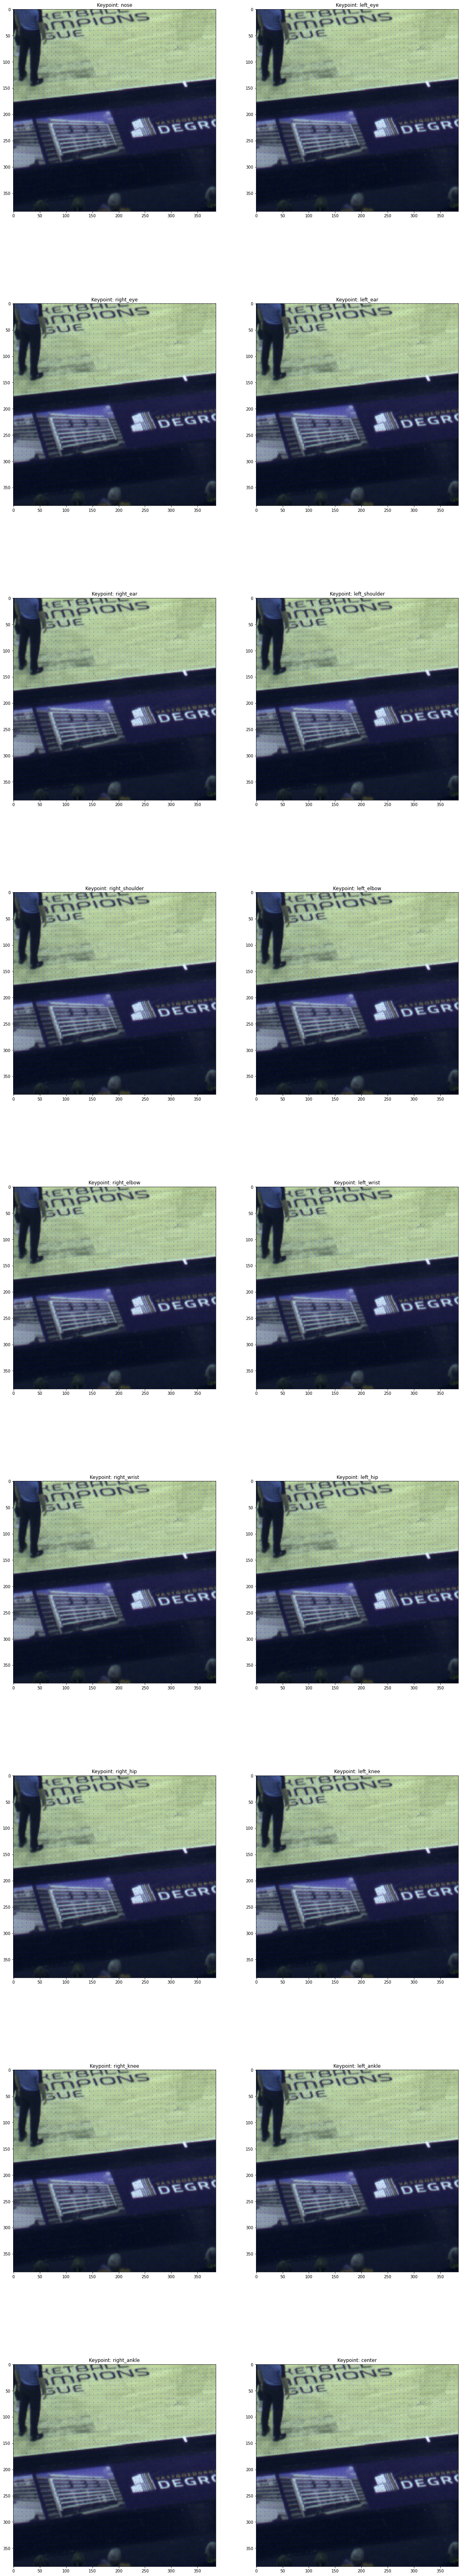

In [25]:
from openpifpaf.datasets.constants import COCO_KEYPOINTS
#####################
# visualize PIF Vectors
#####################


import matplotlib.pyplot as plt
# print(data.shape)
# fig, ax = plt.subplots(9,2)
image = np.transpose(data[data_in_batch].numpy(),(1,2,0))
image = (image - image.min())/(image.max() - image.min())
# plt.imshow(image)
axes = []
fig = plt.figure(figsize=(20,120))
for i in range(18):
    axes.append(fig.add_subplot(9, 2, i+1))
    subplot_title = ('Keypoint: '+ COCO_KEYPOINTS[i])
    axes[-1].set_title(subplot_title)
    
    y = target[0][1][data_in_batch][i][0]
    x = target[0][1][data_in_batch][i][1]
    
    origin = np.indices(x.shape)
    origin_copy = origin.copy()
    origin_copy[0] = origin[1]*8
    origin_copy[1] = origin[0]*8
    plt.quiver(*origin_copy, y, -x,scale=70, color='r')
    plt.scatter(x=origin[0]*8, y=origin[1]*8, c='b', s=.1)
    
    confidence = target[0][0][data_in_batch][i]
#     plt.scatter(x=confidence[0]*8, y=confidence[1]*8, c='b', s=.1)
    
    plt.imshow(image)
    
plt.show




In [26]:
print(target[1]['semantic'].shape)
print(target[1]['offset'].shape)

torch.Size([4, 385, 385])
torch.Size([4, 2, 385, 385])


tensor(0)


<function matplotlib.pyplot.show(close=None, block=None)>

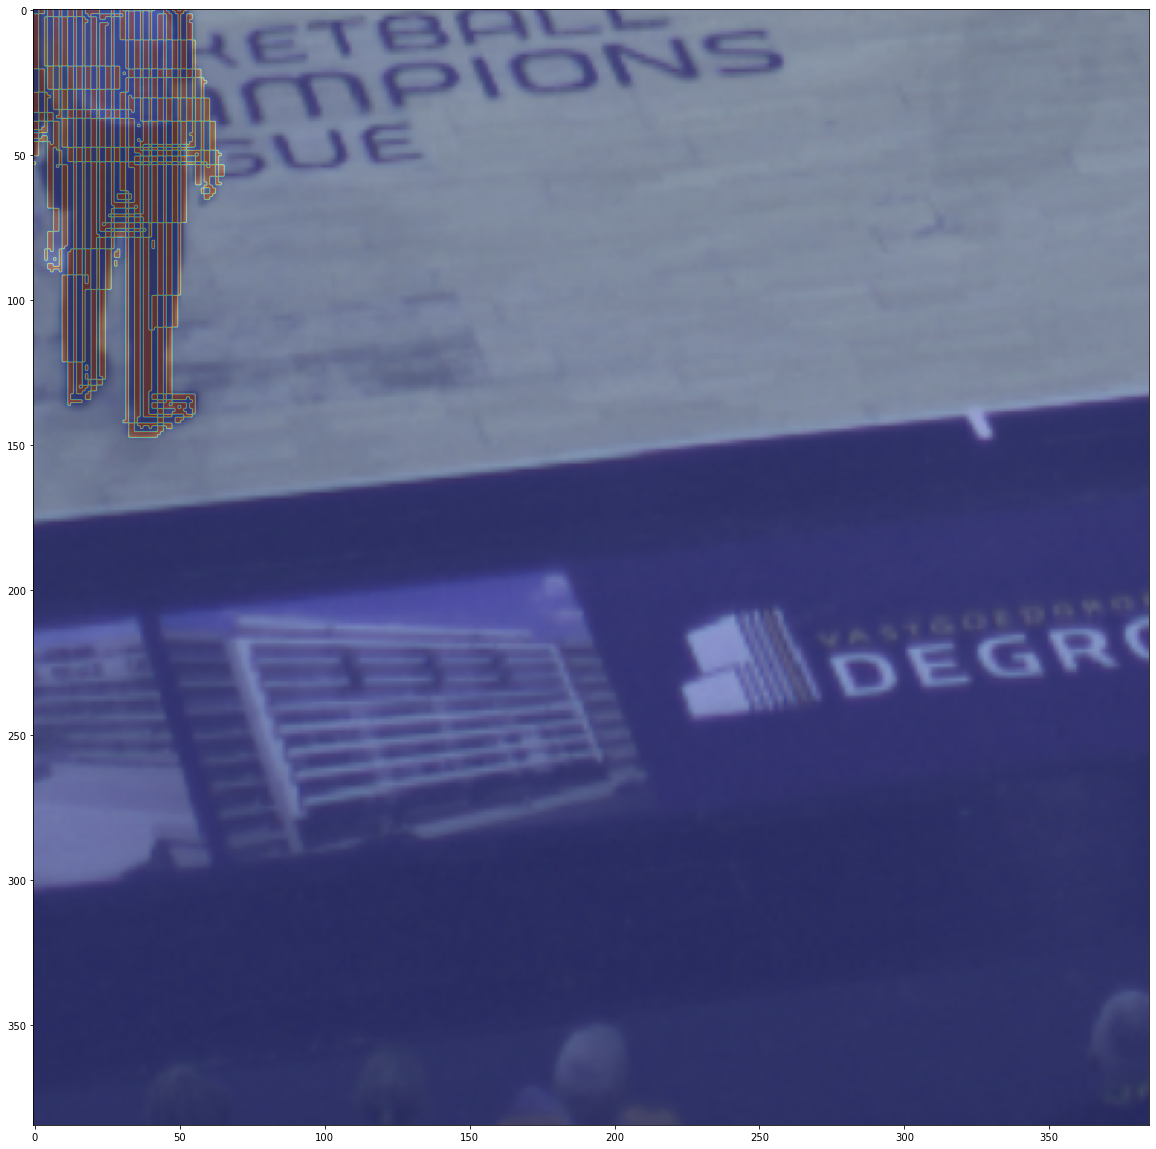

In [27]:

#####################
# visualize PAN 
#####################


import matplotlib.pyplot as plt
import copy
# print(data.shape)
# fig, ax = plt.subplots(9,2)
image = np.transpose(data[data_in_batch].numpy(),(1,2,0))
image = (image - image.min())/(image.max() - image.min())
# plt.imshow(image)
axes = []
fig = plt.figure(figsize=(20,120))
# nnn = copy.deepcopy(target[1]['semantic'][data_in_batch])
# mmm = np.ones((385,385))
# mmm = mmm*nnn.numpy()
# mmm[0:385:4, 0:385:4] = np.nan

for i in range(1):
    axes.append(fig.add_subplot(1, 1, i+1))
#     subplot_title = ('Keypoint: '+ str(i+1))
#     axes[-1].set_title(subplot_title)
    
    y = target[1]['offset'][data_in_batch][0]
    x = target[1]['offset'][data_in_batch][1]
    
    origin = np.indices(x.shape)
    origin_copy = origin.copy()
    origin_copy[0] = origin[1]
    origin_copy[1] = origin[0]
#     plt.quiver(*origin_copy, x, -y, scale=500, color='r', alpha=1)
#     plt.scatter(x=origin[0], y=origin[1], c='b', s=.8)
    
#     confidence = target[0][0][data_in_batch][i]
#     plt.scatter(x=confidence[0]*8, y=confidence[1]*8, c='b', s=.1)
    semantic = target[1]['semantic'][data_in_batch]
    plt.imshow(semantic, alpha=.7, cmap='jet')
    print(np.isnan(semantic).sum())
    
    plt.imshow(image, alpha=.5)
    
plt.show




In [15]:
try:
    data, target, meta = next(iter(scenes))
except:
    

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])